In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data=pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')
raw_data.head(10)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


# Preparing Data

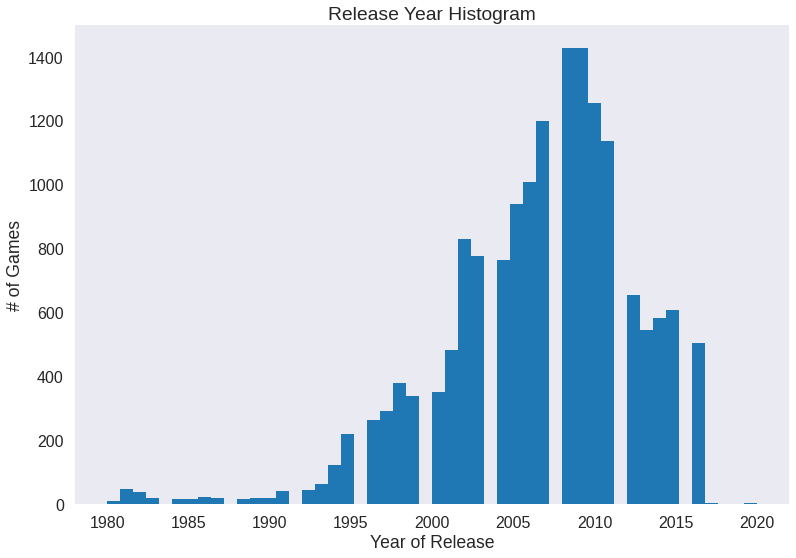

<Figure size 504x504 with 0 Axes>

In [121]:
plt.hist(raw_data['Year_of_Release'], bins = 50)

plt.xlabel("Year of Release")
plt.ylabel("# of Games")
plt.title("Release Year Histogram")
plt.style.use('seaborn-poster')
plt.figure(figsize=(7,7))
plt.show()

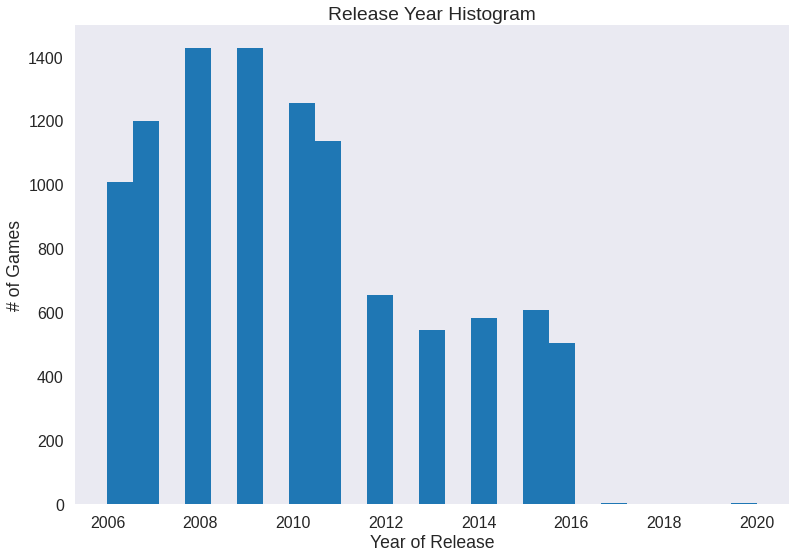

<Figure size 504x504 with 0 Axes>

In [122]:
#We are going to filter this data with one simple reason. Game industry before the release of PS3 has different rules and sale records, which we are not interested.
#Also some critical column fields such as Critic_Score does not appear often before 2006.

YearFilteredData = raw_data.loc[(raw_data['Year_of_Release'] > 2005)]
plt.hist(YearFilteredData['Year_of_Release'], bins = 25)
plt.xlabel("Year of Release")
plt.ylabel("# of Games")
plt.title("Release Year Histogram")
plt.style.use('seaborn-poster')
plt.figure(figsize=(7,7))
plt.show()


In [123]:

YearFilteredData = YearFilteredData[~YearFilteredData['Critic_Score'].isnull()]
print(YearFilteredData.isnull().sum())
#After clearing null data of critic score most of our null values are solved.
#Publisher Information is important to us so we will filter out that one row too.
print("----------------------")
YearFilteredData = YearFilteredData[~YearFilteredData['Publisher'].isnull()]
print(YearFilteredData.isnull().sum())


Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            1
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score          16
User_Count         529
Developer            4
Rating              72
dtype: int64
----------------------
Name                 0
Platform             0
Year_of_Release      0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score          16
User_Count         529
Developer            4
Rating              72
dtype: int64


In [124]:
YearFilteredData.Publisher.unique()
#Publisher names has some mistakes.
#By mistakes I mean some work needs to be done, such as:
#Changing the sub-company names
#Changing different names for the same companies
#Eliminating companies which are too small for us to make a deduction.

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Activision', 'Sony Computer Entertainment', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'LucasArts', '505 Games',
       'Capcom', 'Warner Bros. Interactive Entertainment', 'RedOctane',
       'Eidos Interactive', 'Namco Bandai Games', 'MTV Games', 'THQ',
       'Disney Interactive Studios', 'Atari', 'Sega', 'Midway Games',
       'Deep Silver', 'NCSoft', 'Valve Software', 'Mindscape', 'Valve',
       'Hello Games', 'Codemasters', 'Zoo Games', 'RTL', 'D3Publisher',
       'Vivendi Games', 'City Interactive', 'Russel', 'Atlus',
       'Mastertronic', 'Slightly Mad Studios', 'Tomy Corporation',
       'Tecmo Koei', 'Focus Home Interactive', 'Game Factory',
       'Marvelous Entertainment', 'Square Enix ', 'Ubisoft Annecy',
       'Rising Star Games', 'Scholastic Inc.', 'Level 5', 'Koch Media',
      

In [125]:
#Replacing the publisher names for sub-companies
YearFilteredData['Publisher'] = YearFilteredData['Publisher'].replace(['EA Games'],['Electronic Arts'])
YearFilteredData['Publisher'] = YearFilteredData['Publisher'].replace(['Ubisoft Annecy'],['Ubisoft'])
YearFilteredData['Publisher'] = YearFilteredData['Publisher'].replace(['Sony Computer Entertainment','Sony Computer Entertainment Europe','Sony Computer Entertainment America','Sony Online Entertainment'],['Sony','Sony','Sony','Sony'])
YearFilteredData['Publisher'] = YearFilteredData['Publisher'].replace(['Activision Value','Activision Blizzard'],['Activision','Activision'])
YearFilteredData.loc[(YearFilteredData['Publisher'] == "Activision" )].count()

Name               363
Platform           363
Year_of_Release    363
Genre              363
Publisher          363
NA_Sales           363
EU_Sales           363
JP_Sales           363
Other_Sales        363
Global_Sales       363
Critic_Score       363
Critic_Count       363
User_Score         363
User_Count         326
Developer          363
Rating             363
dtype: int64

In [126]:
publisherNames = list()
publisherNames=YearFilteredData.Publisher.unique()
selectedPubNames = list()
for  compName in publisherNames:
  
  if YearFilteredData.loc[(YearFilteredData['Publisher'] == compName )].Name.count() > 25:
    selectedPubNames.append(compName)
print(selectedPubNames)
print(len(selectedPubNames))
#These 31 companies are selected for us to make a research about their economic power.
#This research will lead us to collect information with webscraping.


['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive', 'Activision', 'Sony', 'Ubisoft', 'Bethesda Softworks', 'Electronic Arts', 'Konami Digital Entertainment', 'Square Enix', 'LucasArts', '505 Games', 'Capcom', 'Warner Bros. Interactive Entertainment', 'Eidos Interactive', 'Namco Bandai Games', 'THQ', 'Disney Interactive Studios', 'Atari', 'Sega', 'Midway Games', 'Deep Silver', 'Codemasters', 'D3Publisher', 'Vivendi Games', 'Tecmo Koei', 'Focus Home Interactive', 'Rising Star Games', 'Nippon Ichi Software', 'Ignition Entertainment', 'Majesco Entertainment']
31


In [127]:
#Web scraping part is implemented in scraper.py document. Description of the implementation is provided there.
#Result of this process is the GameCompRevF.csv

RevData=pd.read_csv('/content/GameCompRevF.csv')
RevData.head(25)
#Data cleaning for this data is again necessary.


,Unnamed: 0,Company Name,Year,Revenue
0,0,Nintendo,2020,"$12,038"
1,1,Nintendo,2019,"$10,805"
2,2,Nintendo,2018,"$9,501"
3,3,Nintendo,2017,"$4,304"
4,4,Nintendo,2016,"$4,187"
5,5,Nintendo,2015,"$5,003"
6,6,Nintendo,2014,"$5,717"
7,7,Nintendo,2013,"$7,689"
8,8,Nintendo,2012,"$8,225"
9,9,Nintendo,2011,"$12,172"


In [128]:
RevData.drop('Unnamed: 0', inplace=True, axis=1)




In [129]:
#Revenue column needs cleaning for conversion to float.
CopyRevData = RevData.copy()
for index, row in CopyRevData.iterrows():    
    CopyRevData['Revenue'][index] = CopyRevData['Revenue'][index].replace('$','')
    CopyRevData['Revenue'][index] = CopyRevData['Revenue'][index].replace(',','')
    
CopyRevData = CopyRevData[CopyRevData.Revenue != '']

for index, row in CopyRevData.iterrows():
    CopyRevData['Revenue'][index] = float(CopyRevData['Revenue'][index])



pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1550)
pd.set_option('display.max_colwidth', 15000)
CopyRevData.head(150)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Company Name,Year,Revenue
0,Nintendo,2020,12038
1,Nintendo,2019,10805
2,Nintendo,2018,9501
3,Nintendo,2017,4304
4,Nintendo,2016,4187
5,Nintendo,2015,5003
6,Nintendo,2014,5717
7,Nintendo,2013,7689
8,Nintendo,2012,8225
9,Nintendo,2011,12172


In [130]:
#Finally we got our table ready for usage.
#But not all the companies have same number of rows for each year. So best way to use this financial data is to use their avg.

#Company Names column for new dataframe.
CompanyNames=np.unique((CopyRevData['Company Name'])) 

RevenueMeansList = list()
for cname in CompanyNames:
  tempdf= CopyRevData.loc[CopyRevData['Company Name'] == cname]

  xx=tempdf['Revenue'].mean()
  
  RevenueMeansList.append(xx)

RevenueMeansArray = np.asarray(RevenueMeansList)

datatable2 = {'Publisher': CompanyNames,
        'RevMean': RevenueMeansArray
        
        }

#Our avg revenue table is done and ready for further usage
RevMeansdf = pd.DataFrame(datatable2, columns = ['Publisher','RevMean'])
print(RevMeansdf.head(20))

                                 Publisher        RevMean
0                               Activision    4081.529412
1                                    Atari      21.394000
2                                   Capcom     792.000000
3                              Codemasters      86.742500
4               Disney Interactive Studios   46708.562500
5                          Electronic Arts    4074.937500
6                   Focus Home Interactive     129.202500
7             Konami Digital Entertainment    2490.687500
8                   Microsoft Game Studios   80337.750000
9                       Namco Bandai Games       6.392000
10                                Nintendo    9184.500000
11                             Nippon Ichi      45.480000
12                    Nippon Ichi Software      36.040000
13                                    Sony   70908.875000
14                             Square Enix    2413.500000
15                    Take-Two Interactive    1454.437500
16            

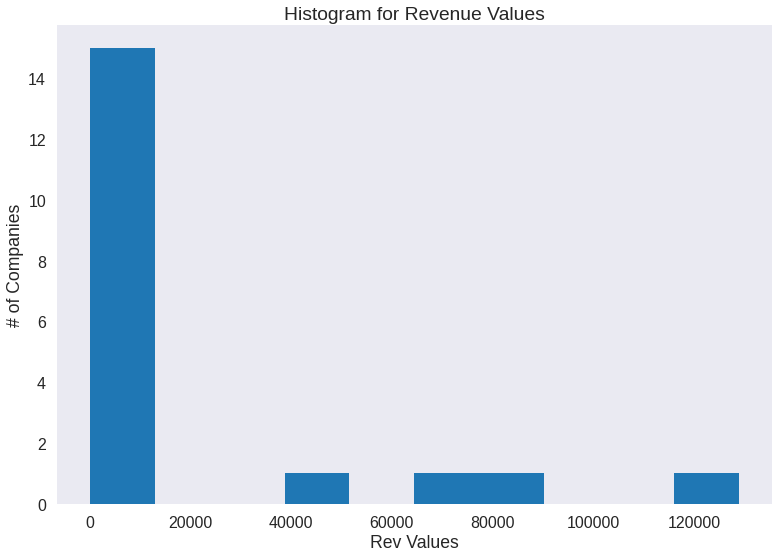

,RevMean
count,19.000000
mean,18608.336864
std,36400.912563
min,6.392000
25%,107.972500
50%,1454.437500
75%,6633.014706
max,128961.400000


In [131]:
plt.hist(RevMeansdf['RevMean']) #As we can see from the histogram the confirmed case values have some extreme outliers.
plt.xlabel("Rev Values")
plt.ylabel("# of Companies")
plt.title("Histogram for Revenue Values")
plt.style.use('seaborn-poster')
plt.show()
RevMeansdf.describe()
#We have 4 extreme outliers, this is caused by them being big companies but not just with gaming.
#We want to use this revenue data for relating it with games, 
#since the information of how much do these companies spend on gaming maybe dropping them is a right idea.

In [132]:
compnamestoUse=RevMeansdf.Publisher.unique()
len(compnamestoUse)
YearFilteredData = YearFilteredData.loc[YearFilteredData['Publisher'].isin(compnamestoUse)]
#We want to merge two datasets by using Publisher company column.
finaldf = pd.merge(YearFilteredData, RevMeansdf, on="Publisher")

In [133]:
finaldf

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,RevMean
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,9184.50
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,9184.50
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,9184.50
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,9184.50
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,9184.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,Nippon Ichi Software,0.02,0.00,0.00,0.00,0.02,55.0,19.0,4.7,34.0,"Mediascape, CUBETYPE",E10+,36.04
3242,The Awakened Fate Ultimatum,PS3,2014.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.02,0.00,0.02,65.0,20.0,7.3,23.0,Nippon Ichi Software,T,36.04
3243,Battle Princess of Arcadias,PS3,2013.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.02,0.00,0.02,69.0,22.0,7.9,25.0,ApolloSoft,T,36.04
3244,Republique,PS4,2016.0,Action,Nippon Ichi Software,0.00,0.01,0.01,0.00,0.01,72.0,35.0,5.8,29.0,"Camouflaj, LLC",M,36.04


# Data Analysis Korhan Köz

In [114]:
import seaborn as sns
#This part of the project will focus on Critic Score and RevMean columns, after analyzing these two columns and their relationship,
#a hypothesis testing will be done.
datakk = finaldf[['Publisher' ,'RevMean', 'Critic_Score' , 'User_Score']]

datakk['Critic_Score'] = datakk['Critic_Score']/10
#User score values were not cleaned in data prep, but I want to see the relationship btw Critic and User scores.
datakk = datakk[~datakk['User_Score'].isnull()]
datakk = datakk[datakk.User_Score != 'tbd']

datakk.User_Score = datakk.User_Score.astype(float)
#To see and evaluate what causes the difference in user and critic scores.
datakk['ScoreDiff'] = (datakk['Critic_Score'] - datakk['User_Score'])

datakk

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Publisher,RevMean,Critic_Score,User_Score,ScoreDiff
0,Nintendo,9184.50,7.6,8.0,-0.4
1,Nintendo,9184.50,8.2,8.3,-0.1
2,Nintendo,9184.50,8.0,8.0,0.0
3,Nintendo,9184.50,8.9,8.5,0.4
4,Nintendo,9184.50,5.8,6.6,-0.8
...,...,...,...,...,...
3241,Nippon Ichi Software,36.04,5.5,4.7,0.8
3242,Nippon Ichi Software,36.04,6.5,7.3,-0.8
3243,Nippon Ichi Software,36.04,6.9,7.9,-1.0
3244,Nippon Ichi Software,36.04,7.2,5.8,1.4


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

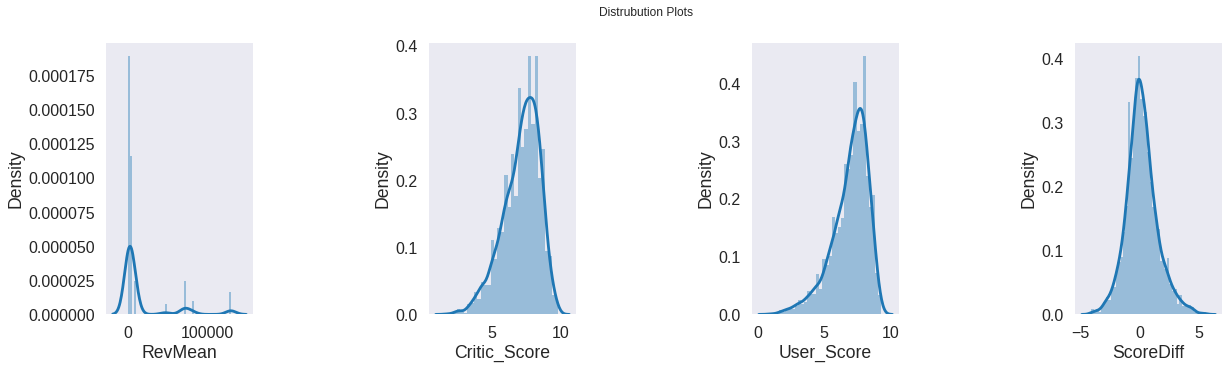

In [115]:
#Distrubution plots for numeric columns

fig, axes = plt.subplots(1, 4, sharex=False, figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=1.2, hspace=None)
fig.suptitle('Distrubution Plots')
sns.distplot(datakk['RevMean'], ax=axes[0])
sns.distplot(datakk['Critic_Score'], ax=axes[1])
sns.distplot(datakk['User_Score'], ax=axes[2])
sns.distplot(datakk['ScoreDiff'], ax=axes[3])

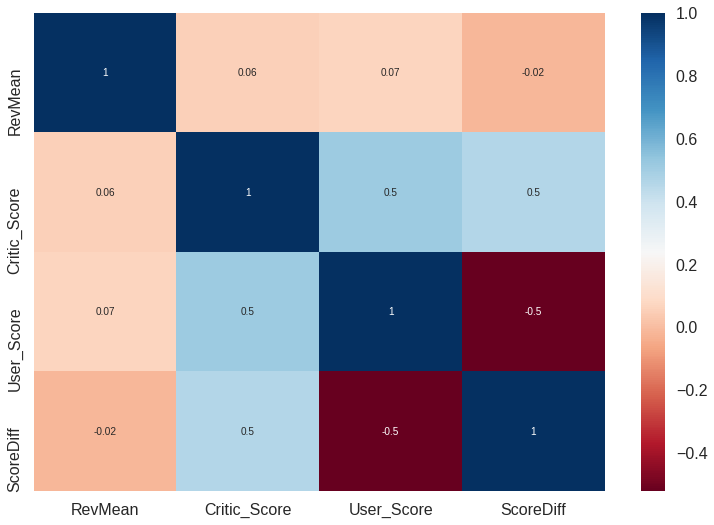

In [116]:
#Correlation heatmap for the data
sns.heatmap(datakk.corr(), annot = True, fmt='.1g', cmap ='RdBu')
# As we can see there is not a single strong correlation with RevMean column.
#Relations between the User_Score, Critic_Score and ScoreDiff can be further examined.

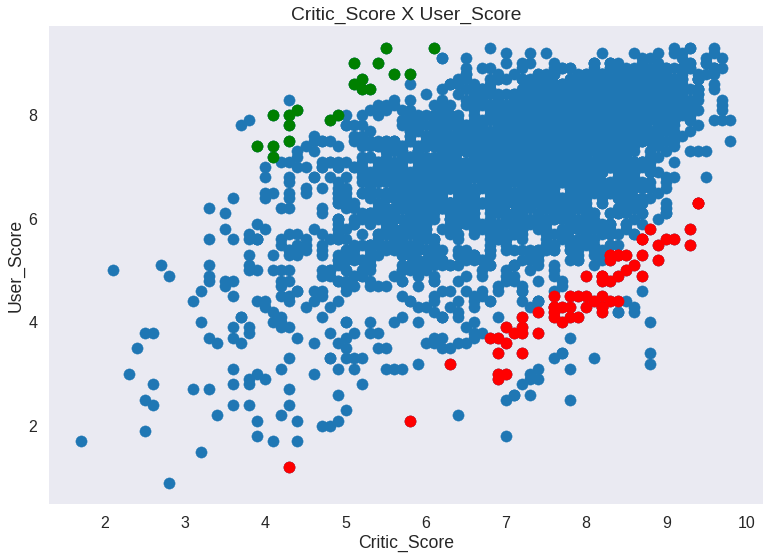

In [117]:
plt.scatter(datakk['Critic_Score'],datakk['User_Score'])
#Points where critic scores are higher than the user scores
critHigh= datakk.loc[(datakk['ScoreDiff'] > 3) & (datakk['ScoreDiff'] <= 4.0) ]
#Points where user scores are higher than the critic scores
userHigh= datakk.loc[(datakk['ScoreDiff'] < -3) & (datakk['ScoreDiff'] >= -4.0) ]

plt.scatter(critHigh['Critic_Score'],critHigh['User_Score'],color="red")
plt.scatter(userHigh['Critic_Score'],userHigh['User_Score'],color="green")
plt.xlabel("Critic_Score")
plt.ylabel("User_Score")
plt.title("Critic_Score X User_Score")
plt.style.use('seaborn-poster')
plt.show()



In [118]:
print(len(critHigh['Publisher'].unique()))
print(len(userHigh['Publisher'].unique()))
print(userHigh)
print(critHigh)

11
7
                         Publisher      RevMean  Critic_Score  User_Score  ScoreDiff
78                        Nintendo  9184.500000           5.4         9.0       -3.6
681                     Activision  4081.529412           6.1         9.3       -3.2
797                     Activision  4081.529412           5.1         9.0       -3.9
818                     Activision  4081.529412           5.5         9.3       -3.8
832                     Activision  4081.529412           4.1         7.2       -3.1
836                     Activision  4081.529412           3.9         7.4       -3.5
837                     Activision  4081.529412           4.1         8.0       -3.9
1059                       Ubisoft  1446.800000           4.9         8.0       -3.1
1258                       Ubisoft  1446.800000           4.1         7.4       -3.3
1267                       Ubisoft  1446.800000           5.1         8.6       -3.5
2022               Electronic Arts  4074.937500           4.

In [119]:
#Lets examine two datasets further.
#Before testing our hypothesis about the Revenue value difference, we want to see if there is a significant difference whom is it on behalf of.
print("CritHigh row count is", critHigh['Publisher'].count())
print("UserHigh row count is", userHigh['Publisher'].count())
print("So there are more ocasions that critics give higher scores, than the users giving higher scores.")
print("------------------------------------------------------------------------------------------------")
print("Mean Revenue value for games which critics gave higher scores is: ",critHigh['RevMean'].mean())
print("Mean Revenue value for games which users gave higher scores is: ",userHigh['RevMean'].mean())
print("So if there is a significant difference it is on the behalf of games which has higher critic scores than the user scores.")


CritHigh row count is 66
UserHigh row count is 20
So there are more ocasions that critics give higher scores, than the users giving higher scores.
------------------------------------------------------------------------------------------------
Mean Revenue value for games which critics gave higher scores is:  5073.39271212121
Mean Revenue value for games which users gave higher scores is:  2343.075273529412
So if there is a significant difference it is on the behalf of games which has higher critic scores than the user scores.


In [120]:
from scipy import stats
CritHighRM = critHigh['RevMean']
UserHighRM = userHigh['RevMean']
#Revenue means for games that have higher critic scores than user scores = CritHighRM
#Revenue means for games that have higher user scores than critic scores = UserHighRM

#Null hypothesis: 
#CritHighRM - UserHighRM = 0, meaning there is no significant difference between the two groups
#Alternative hypothesis:
#CritHighRM - UserHighRM != 0, meaning there is a significant difference between the two groups

tscoreRM,pvalueRM=stats.ttest_ind(CritHighRM,UserHighRM)
print("Tscore is: ",tscoreRM," Pvalue is: ",pvalueRM)
print("Pvalue is higher than the desired 0.05 value so we cannot reject the null hypothesis.")
print("There is no difference between the the two groups.")

Tscore is:  1.2175533632344722  Pvalue is:  0.22680304940052437
Pvalue is higher than the desired 0.05 value so we cannot reject the null hypothesis.
There is no difference between the the two groups.


# Data Analysis Alp İnce

In [101]:
genre_sales = finaldf.copy(deep = True)

In [102]:
genres = genre_sales[['Year_of_Release','Genre','Name','Publisher','Global_Sales','Critic_Score', 'User_Score','RevMean' ]].copy()
genres

,Year_of_Release,Genre,Name,Publisher,Global_Sales,Critic_Score,User_Score,RevMean
0,2006.0,Sports,Wii Sports,Nintendo,82.53,76.0,8,9184.50
1,2008.0,Racing,Mario Kart Wii,Nintendo,35.52,82.0,8.3,9184.50
2,2009.0,Sports,Wii Sports Resort,Nintendo,32.77,80.0,8,9184.50
3,2006.0,Platform,New Super Mario Bros.,Nintendo,29.80,89.0,8.5,9184.50
4,2006.0,Misc,Wii Play,Nintendo,28.92,58.0,6.6,9184.50
...,...,...,...,...,...,...,...,...
3241,2016.0,Shooter,Touhou Genso Rondo: Bullet Ballet,Nippon Ichi Software,0.02,55.0,4.7,36.04
3242,2014.0,Role-Playing,The Awakened Fate Ultimatum,Nippon Ichi Software,0.02,65.0,7.3,36.04
3243,2013.0,Role-Playing,Battle Princess of Arcadias,Nippon Ichi Software,0.02,69.0,7.9,36.04
3244,2016.0,Action,Republique,Nippon Ichi Software,0.01,72.0,5.8,36.04


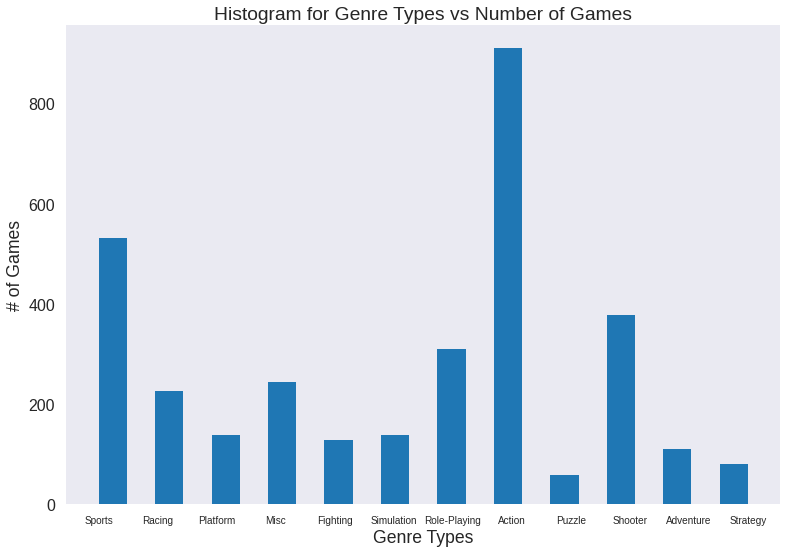

In [103]:
plt.hist(genres['Genre'], bins=23)
plt.style.use('seaborn-dark')
plt.xlabel('Genre Types')
plt.ylabel('# of Games')
plt.title("Histogram for Genre Types vs Number of Games")
plt.xticks(fontsize=10)
plt.show()

# I plot this histogram in order to see which genres are the most produced by the companies.
#As we can see from the histogram, the two most popular genres are action and sports.
#So, I'm going to look which genre is more sensible to produce for companies.

In [104]:
actionGames = genres[genres.Genre == 'Action']
actionGames

#I created a dataset of action games only to review action games.

,Year_of_Release,Genre,Name,Publisher,Global_Sales,Critic_Score,User_Score,RevMean
19,2006.0,Action,The Legend of Zelda: Twilight Princess,Nintendo,7.15,95.0,9,9184.50
25,2007.0,Action,The Legend of Zelda: Phantom Hourglass,Nintendo,5.08,90.0,8,9184.50
28,2013.0,Action,Luigi's Mansion: Dark Moon,Nintendo,4.59,86.0,8.4,9184.50
32,2011.0,Action,The Legend of Zelda: Skyward Sword,Nintendo,3.95,93.0,8,9184.50
39,2009.0,Action,The Legend of Zelda: Spirit Tracks,Nintendo,3.31,87.0,7.8,9184.50
...,...,...,...,...,...,...,...,...
3201,2014.0,Action,Danganronpa Another Episode: Ultra Despair Girls,Nippon Ichi Software,0.21,72.0,8.4,36.04
3205,2011.0,Action,Way of the Samurai 4,Nippon Ichi Software,0.19,58.0,6.5,36.04
3218,2015.0,Action,Rodea the Sky Soldier,Nippon Ichi Software,0.12,45.0,6.5,36.04
3236,2015.0,Action,Rodea the Sky Soldier,Nippon Ichi Software,0.04,45.0,5.6,36.04


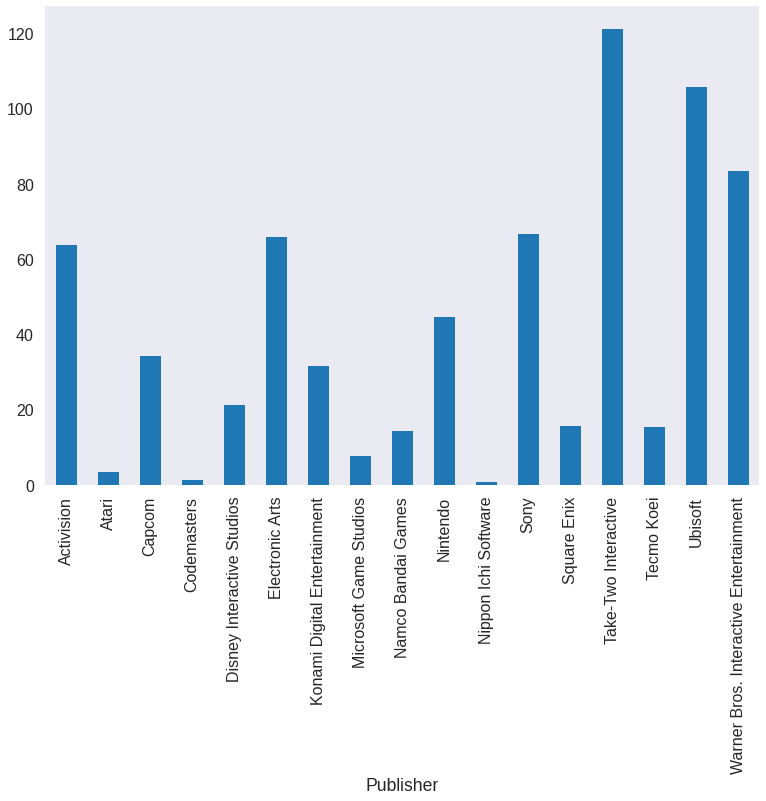

In [105]:
actionGames.groupby('Publisher')['Global_Sales'].sum().plot(kind='bar')
plt.show()

#This histogram shows us leading company is Take-Two Interactive for action games. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f847ed59dd8>,
      dtype=object)

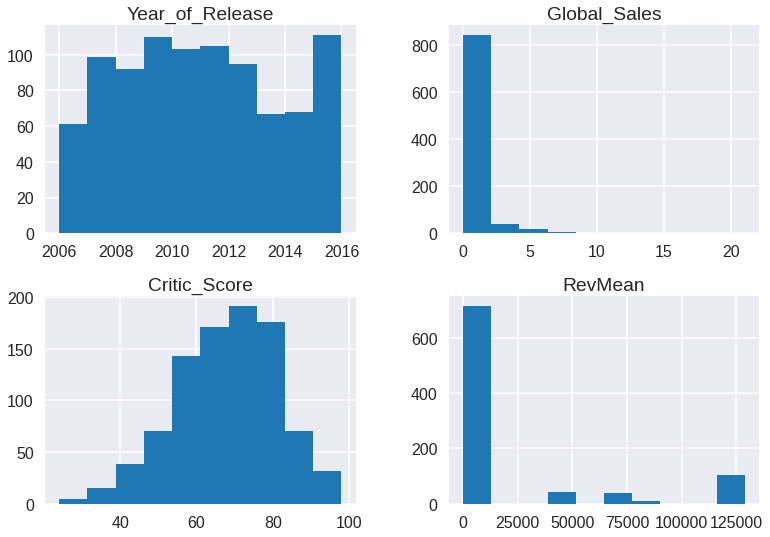

In [106]:
actionGames.hist()
#As we can see, global sales values of most action games are in range 0-5 million. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


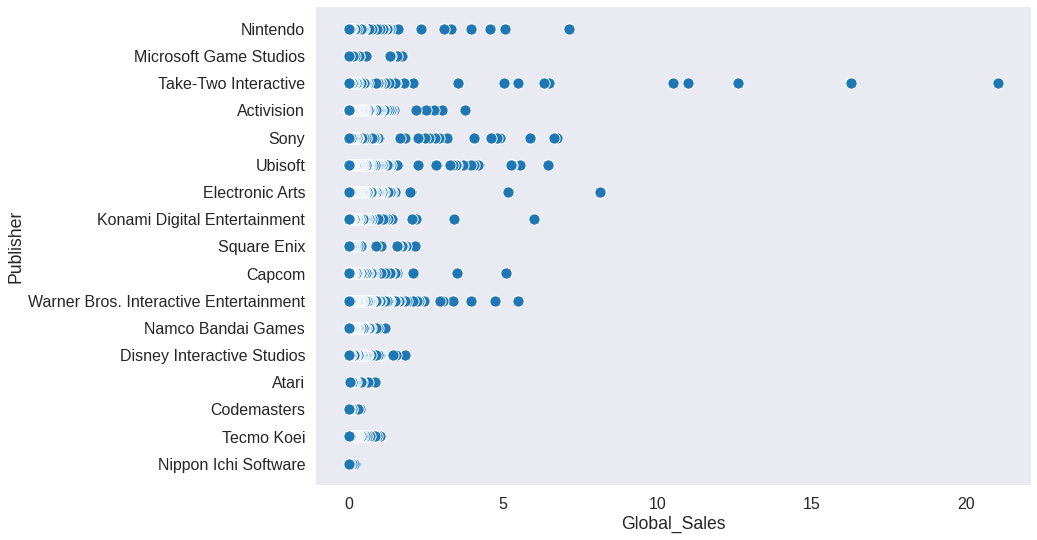

In [107]:
sns.scatterplot(actionGames['Global_Sales'], actionGames['Publisher'])

#This scatter plot shows which publisher have the most global sale of action games. 
#There are many many games with a global sales value of 0-5 million Although there are 911 action games, 
#the highest sales value is 21 million and this game is made by Take-Two Interactive Company.

In [108]:
sportsGames = genres[genres.Genre == 'Sports']
sportsGames
#I created a dataframe of sports games only to review sports games.

,Year_of_Release,Genre,Name,Publisher,Global_Sales,Critic_Score,User_Score,RevMean
0,2006.0,Sports,Wii Sports,Nintendo,82.53,76.0,8,9184.5000
2,2009.0,Sports,Wii Sports Resort,Nintendo,32.77,80.0,8,9184.5000
6,2007.0,Sports,Wii Fit,Nintendo,22.70,80.0,7.7,9184.5000
7,2009.0,Sports,Wii Fit Plus,Nintendo,21.79,80.0,7.4,9184.5000
53,2007.0,Sports,Mario Strikers Charged,Nintendo,2.58,79.0,8,9184.5000
...,...,...,...,...,...,...,...,...
3161,2009.0,Sports,Blood Bowl,Focus Home Interactive,0.16,61.0,5.1,129.2025
3173,2009.0,Sports,Blood Bowl,Focus Home Interactive,0.04,72.0,6.5,129.2025
3175,2016.0,Sports,Pro Cycling Manager 2016,Focus Home Interactive,0.03,64.0,4.8,129.2025
3176,2014.0,Sports,Tour de France 2014,Focus Home Interactive,0.03,53.0,5.1,129.2025


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


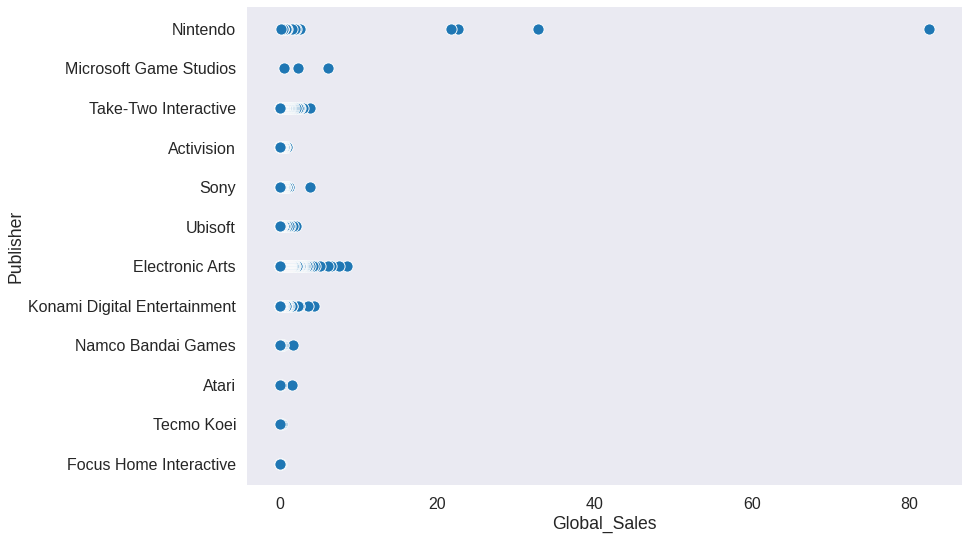

In [109]:
sns.scatterplot(sportsGames['Global_Sales'], sportsGames['Publisher'])
#This scatter plot shows which publisher have the most global sale of sports game
#Although there are 532 sports games, the highest sales value is 82 million and this game is made by Nintendo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f847eb29438>,
      dtype=object)

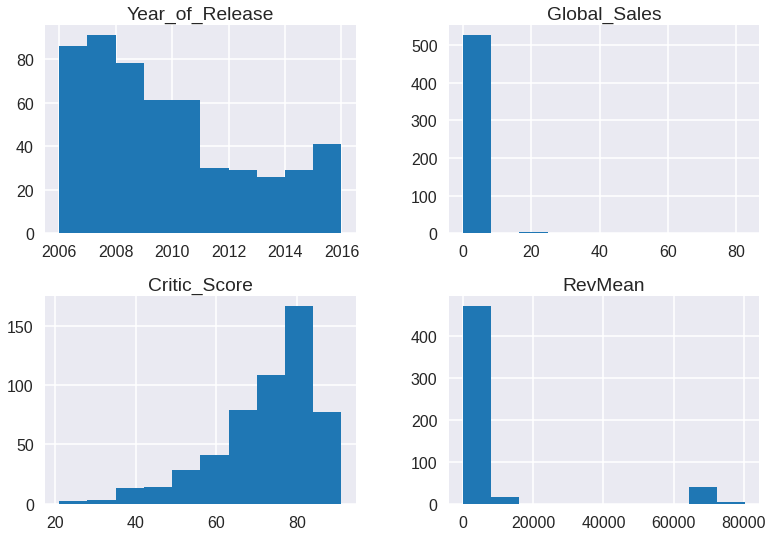

In [110]:
sportsGames.hist()
#As we can see, global sales values of most sports games are also in range 0-5 million.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


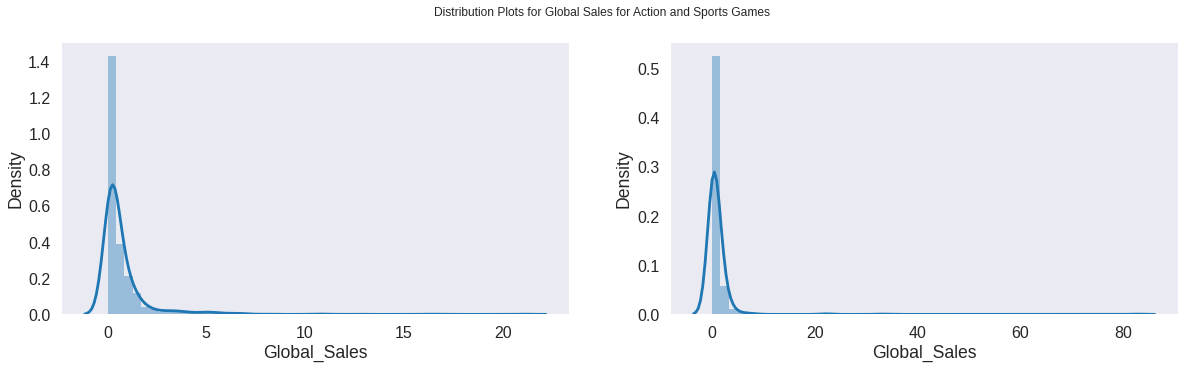

In [111]:
fig, axes = plt.subplots(1,2, sharex=False, figsize=(20,5))
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.2, hspace=None)
fig.suptitle('Distribution Plots for Global Sales for Action and Sports Games')
sns.distplot(actionGames['Global_Sales'], ax=axes[0])
sns.distplot(sportsGames['Global_Sales'], ax=axes[1])

In [112]:
globalSalesMeanA = actionGames.Global_Sales.mean()
print("The mean of global sales of Action Games is: ", globalSalesMeanA)

globalSalesMeanS = sportsGames.Global_Sales.mean()
print("The mean of global sales of Sports Games is: ", globalSalesMeanS)
print("So if there is a significant difference between two two groups in terms of Global Sales it is on behalf of the Sports Games.")

The mean of global sales of Action Games is:  0.7645115257958272
The mean of global sales of Sports Games is:  1.0571240601503742
So if there is a significant difference between two two groups in terms of Global Sales it is on behalf of the Sports Games.


In [113]:
from scipy import stats 

globalSalesAction = actionGames['Global_Sales']
globalSalesSports = sportsGames['Global_Sales']

#The mean of global sales values for action games = MGSA
#The mean of global sales values for sports games = MGSS


#Null hypothesis:
#MGSA - MGSS = 0, meaning there is no significant difference between the two groups.
#Alternative hypothesis:
#MGSA - MGSS = 0, meaning there is a significant difference between the two groups.


tscore, pvalue = stats.ttest_ind(globalSalesAction, globalSalesSports)
print("Tscore is: ", tscore, " Pvalue is: ", pvalue)

print("Our P value for this test is ",pvalue," and it is bigger than 0.5.")
print("So we can accept the null hypothesis and reject the alternative hypothesis.")
print()
print("So we can say that, there is no significant difference between these two genres.")

Tscore is:  -1.9235668061284776  Pvalue is:  0.054605718687814435
Our P value for this test is  0.054605718687814435  and it is bigger than 0.5.
So we can accept the null hypothesis and reject the alternative hypothesis.

So we can say that, there is no significant difference between these two genres.


# Data Analysis Melisa Derun

In [72]:
general_copy_table = finaldf.copy(deep = True)
general_copy_table

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,RevMean
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,9184.50
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,9184.50
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,9184.50
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,9184.50
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,9184.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,Nippon Ichi Software,0.02,0.00,0.00,0.00,0.02,55.0,19.0,4.7,34.0,"Mediascape, CUBETYPE",E10+,36.04
3242,The Awakened Fate Ultimatum,PS3,2014.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.02,0.00,0.02,65.0,20.0,7.3,23.0,Nippon Ichi Software,T,36.04
3243,Battle Princess of Arcadias,PS3,2013.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.02,0.00,0.02,69.0,22.0,7.9,25.0,ApolloSoft,T,36.04
3244,Republique,PS4,2016.0,Action,Nippon Ichi Software,0.00,0.01,0.01,0.00,0.01,72.0,35.0,5.8,29.0,"Camouflaj, LLC",M,36.04


In [73]:
#I narrowed the table according to the following values:'Name','Platform','Publisher','NA_Sales','EU_Sales','Critic_Score.Because these are enough for me now.
sales = general_copy_table[['Name','Platform','Publisher','NA_Sales','EU_Sales','Critic_Score' ]].copy()
sales

,Name,Platform,Publisher,NA_Sales,EU_Sales,Critic_Score
0,Wii Sports,Wii,Nintendo,41.36,28.96,76.0
1,Mario Kart Wii,Wii,Nintendo,15.68,12.76,82.0
2,Wii Sports Resort,Wii,Nintendo,15.61,10.93,80.0
3,New Super Mario Bros.,DS,Nintendo,11.28,9.14,89.0
4,Wii Play,Wii,Nintendo,13.96,9.18,58.0
...,...,...,...,...,...,...
3241,Touhou Genso Rondo: Bullet Ballet,PS4,Nippon Ichi Software,0.02,0.00,55.0
3242,The Awakened Fate Ultimatum,PS3,Nippon Ichi Software,0.00,0.00,65.0
3243,Battle Princess of Arcadias,PS3,Nippon Ichi Software,0.00,0.00,69.0
3244,Republique,PS4,Nippon Ichi Software,0.00,0.01,72.0


In [74]:
#to see column names of the new  data frame
sales.columns

Index(['Name', 'Platform', 'Publisher', 'NA_Sales', 'EU_Sales', 'Critic_Score'], dtype='object')

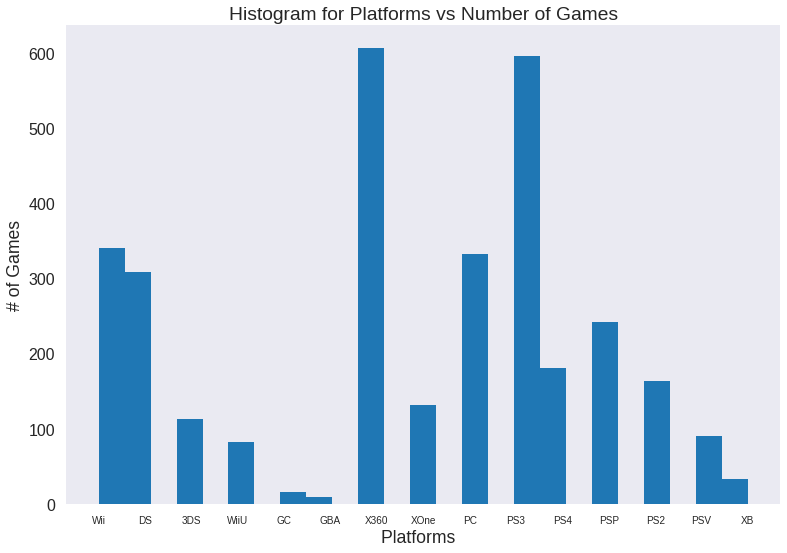

In [75]:
#Iwanted to show histogram of number of games and platforms 
plt.hist(sales['Platform'],bins=25)
plt.style.use('seaborn-dark')
plt.xlabel('Platforms  ')
plt.ylabel('# of Games')
plt.title("Histogram for Platforms vs Number of Games")
plt.xticks(fontsize=10)
plt.show()

These are number of games of all platforms in data table and Pc and Wii is nearly have same number of game according to table above.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


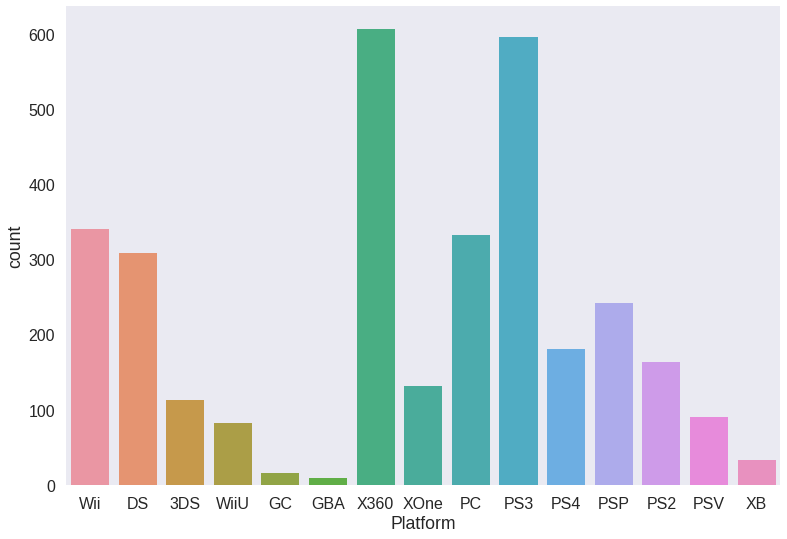

In [76]:
#I used these plot to see count of games for each platform correctly.(Result is same wih above only library is idfferent)
sns.countplot(sales['Platform'])

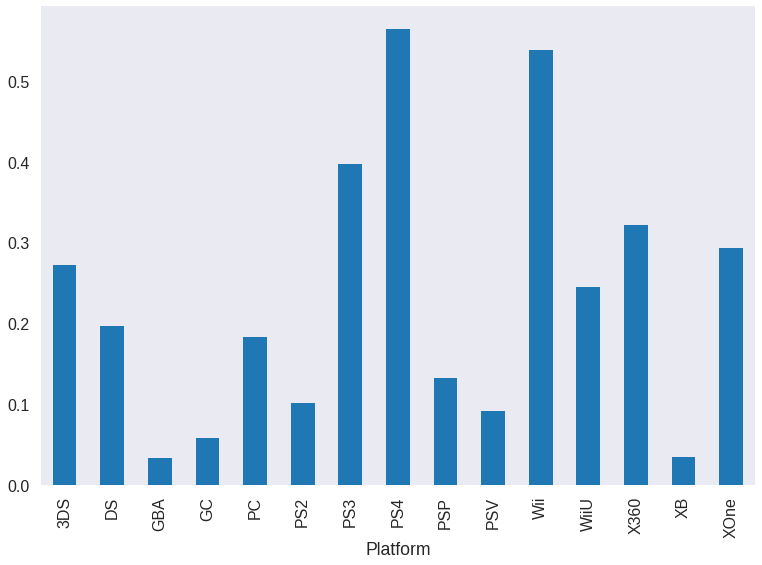

In [77]:
#I groupped the Platform according to EU Sales average 
sales.groupby('Platform')['EU_Sales'].mean().plot(kind='bar')
plt.show()
 

A wanted to make more specific plot for observing detailly and chose EUsales of platform.By looking table above, I see that there is a significant difference between mean of EU sales of Wii and PC.
Mean of EU sales of Wii is more than mean of  EU sales of PC.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


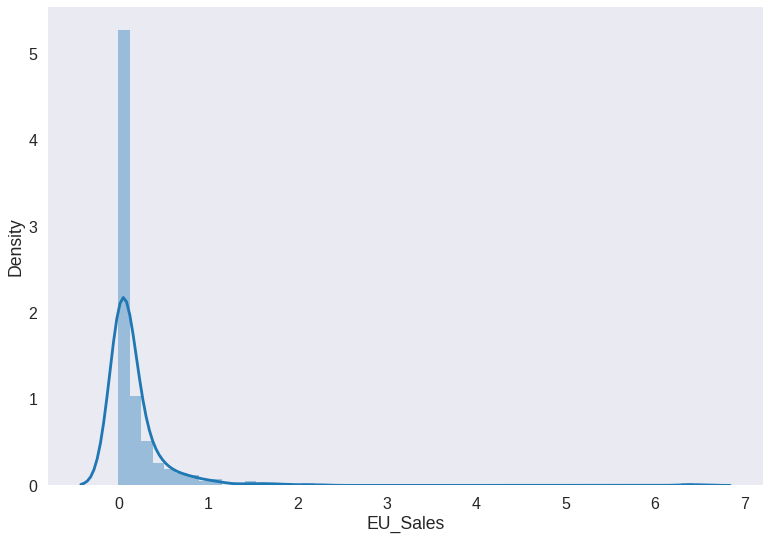

In [78]:
#distribution of PC EU Sales(Using distplot from seaborn library)

sns.distplot(sales[sales['Platform']=='PC'].EU_Sales)

 Distribution of PC EU sales is between 0 and 1 .

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


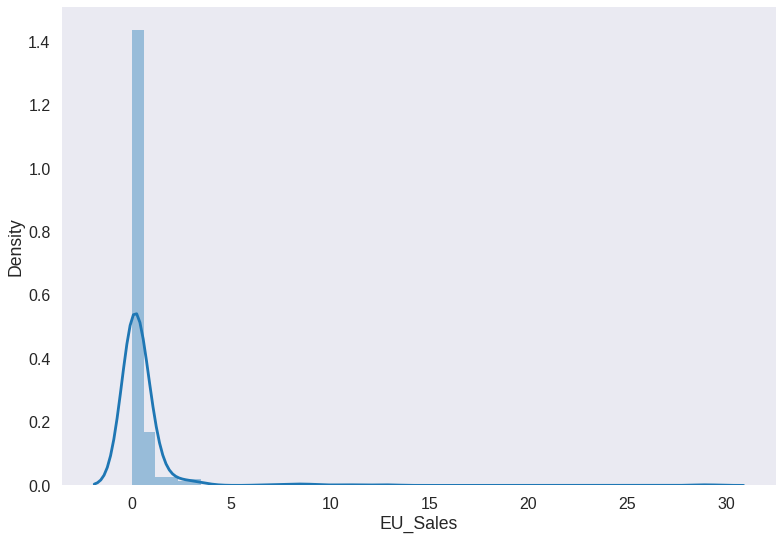

In [79]:
#distribution of Wii EU Sales
sns.distplot(sales[sales['Platform']=='Wii'].EU_Sales)
 #"normally distibuted"

Wii EU_sales distribution is above as percentage.They are very close to between 0 and 4-5 in most of the situation.


In [80]:
#I created this dataframe to see  Wii and PC platform values only.We restricted our dataframe platform  to Wii and PC
listt=('PC','Wii')
df_PC_Wii = sales.loc[sales['Platform'].isin(listt) == True]
df_PC_Wii

#"By examining the histogram values above, I noticed that the values of Wii and PC are close to each other. And I decided to examine these two platforms according to NA sales.
#That's why I created this table, which I limited the platform to Wii and PC."

,Name,Platform,Publisher,NA_Sales,EU_Sales,Critic_Score
0,Wii Sports,Wii,Nintendo,41.36,28.96,76.0
1,Mario Kart Wii,Wii,Nintendo,15.68,12.76,82.0
2,Wii Sports Resort,Wii,Nintendo,15.61,10.93,80.0
4,Wii Play,Wii,Nintendo,13.96,9.18,58.0
5,New Super Mario Bros. Wii,Wii,Nintendo,14.44,6.94,87.0
...,...,...,...,...,...,...
3182,Divinity: Original Sin,PC,Focus Home Interactive,0.00,0.02,87.0
3183,Contrast,PC,Focus Home Interactive,0.00,0.01,62.0
3184,The Technomancer,PC,Focus Home Interactive,0.00,0.01,56.0
3185,Act of Aggression,PC,Focus Home Interactive,0.00,0.01,71.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


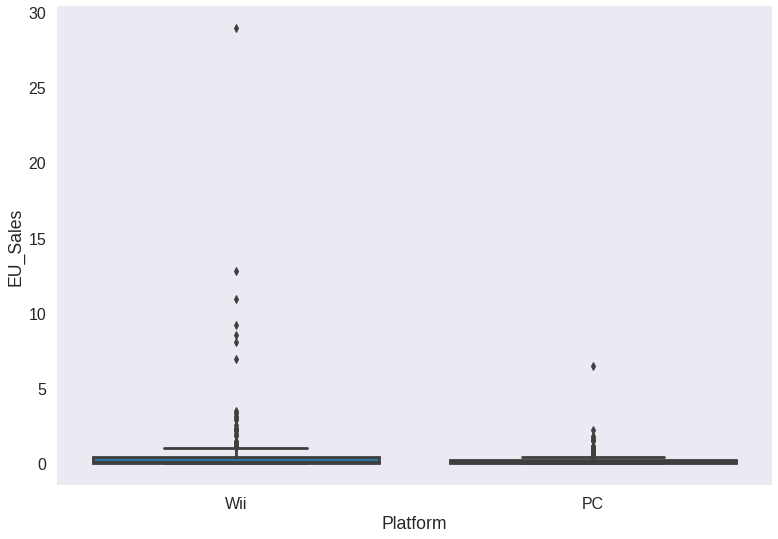

In [81]:
#For PC and Wii boxplot was drawn according to EU_Sales from seaborn library for this plot I used data framr of PC and Wii
# to see distribution and mean of PC EU sales and Wii EU sales

sns.boxplot(df_PC_Wii['Platform'],df_PC_Wii['EU_Sales'])

From box plot we can observe that distribution of Wii and PC EU sales .Looking box sizes we can say that distribution of Wii EU sales is more than PC EU sales
By looking at the first boxplot, we can see that the outliers are more than the first boxplot.
This is because the Wii's EU sales have data sets above the standard deviation.

In [82]:
# I choose PC and Wii EU_Sales values fron the data frame and printed the sum values of these Platforms

print("Wİi : ",df_PC_Wii[df_PC_Wii['Platform']=='Wii'].EU_Sales.sum())
print("PC : ",df_PC_Wii[df_PC_Wii['Platform']=='PC'].EU_Sales.sum())
"Sum value of Wii EU sales is more than sum value of PC EU sales"

Wİi :  183.04999999999998
PC :  60.790000000000006


'Sum value of Wii EU sales is more than sum value of PC EU sales'

From these values we can understand that 

Number of Wii games is  alittle bit more than number of PC games.

Mean of PC games's EU Sales is less than mean of Wii games's EU Sales

So , EU_Sales of Wii games sre more than EU_sales of PC Games.


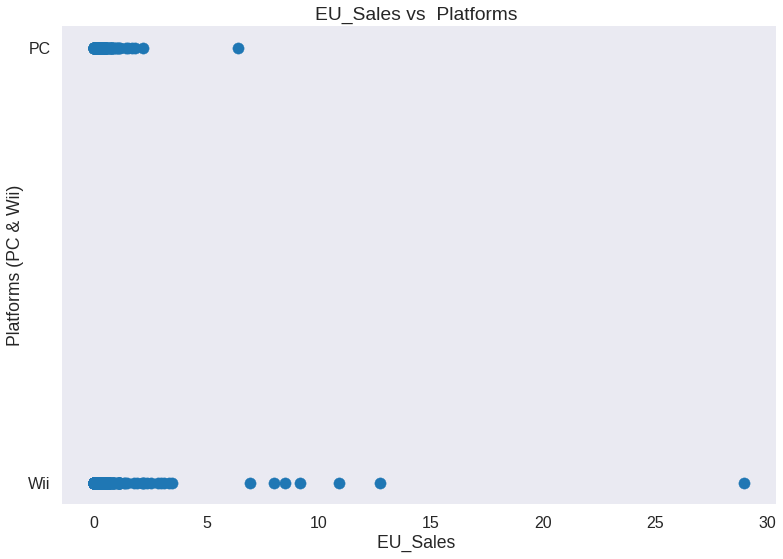

In [83]:
#EU sales vs platforms(PC and Wii) scatter plot
plt.scatter(df_PC_Wii['EU_Sales'], df_PC_Wii['Platform'])
plt.xlabel("EU_Sales ")
plt.ylabel("Platforms (PC & Wii)")
plt.title("EU_Sales vs  Platforms ")
plt.show()

As we can see in the plot above, the distribution of EU sales of wii games is larger  and more dispersed.

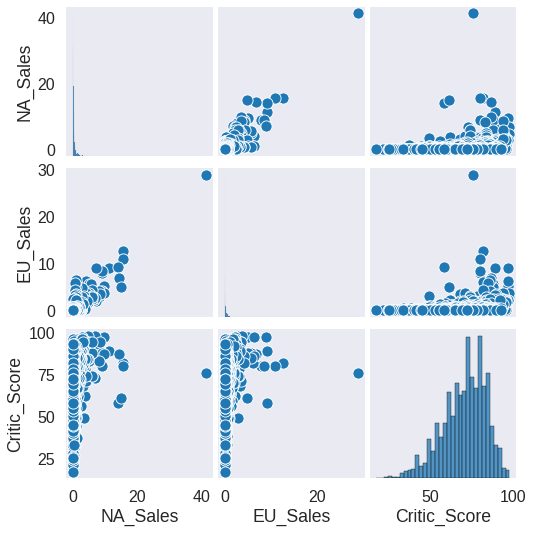

In [84]:
sns.pairplot(sales)

We can see general connectiın between numeric columns of data frame.These are 3 numeric column and so 9 plot.And we can observe increase-decrease of values.

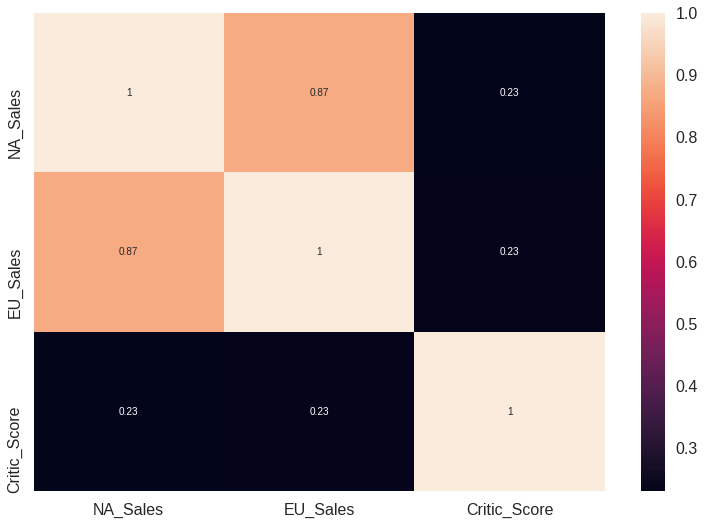

In [85]:
sns.heatmap(np.round(sales.corr(),3),annot=True)

There is correlation between EU sales and NA sales and also there is a correlation( which is les than EUSales and NA sales) between Critic score and NA Sales & EU sales .

In [86]:
#before T test I wanted to see average of the EU sales of PC and Wii.
mean_for_Wii = general_copy_table[general_copy_table['Platform'] == 'Wii'].EU_Sales.mean()
mean_for_Pc = general_copy_table[general_copy_table['Platform'] == 'PC'].EU_Sales.mean()
print("Wii EUSales : ",mean_for_Wii)
print("PC EUSales : ",mean_for_Pc)

Wii EUSales :  0.5383823529411765
PC EUSales :  0.18310240963855437


In [87]:
from scipy import stats
hypo_for_Wii = general_copy_table[general_copy_table['Platform'] == 'Wii'].EU_Sales
hypo_for_PC = general_copy_table[general_copy_table['Platform'] == 'PC'].EU_Sales
 

#EU sales of Wii games EUSWii
#EU Sales of PC games EUSPC

#Null hypothesis: 
#EUSWii - EUSPC = 0, EU sales of Wii is not more than EU sales of PC

#Alternative hypothesis: 
#EUSWii - EUSPC != 0, EU sales of Wii is  more than EU sales of PC

tscoreWP, pvalueWP = stats.ttest_ind(hypo_for_Wii, hypo_for_PC, equal_var = True)
print("Tscore is: ",tscoreWP," Pvalue is: ",pvalueWP)
print("Our P value for this test is ",pvalueWP," and it is smaller than 0.05.")
print("So we can reject the null hypothesis and accept the alternative hypothesis.")
print("So we can  accept that EU sales of Wii is  more than EU sales of PC")
print()

Tscore is:  3.095486016854896  Pvalue is:  0.0020468149993446236
Our P value for this test is  0.0020468149993446236  and it is smaller than 0.05.
So we can reject the null hypothesis and accept the alternative hypothesis.
So we can  accept that EU sales of Wii is  more than EU sales of PC



# Multiple Linear Regression Model for Global_Sales value

In [66]:
#Selecting the candidate columns 
dfkk = finaldf[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','RevMean']]
dfkk.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,RevMean
0,41.36,28.96,3.77,8.45,82.53,76.0,9184.5
1,15.68,12.76,3.79,3.29,35.52,82.0,9184.5
2,15.61,10.93,3.28,2.95,32.77,80.0,9184.5
3,11.28,9.14,6.50,2.88,29.80,89.0,9184.5
4,13.96,9.18,2.93,2.84,28.92,58.0,9184.5


In [67]:
from sklearn.preprocessing import StandardScaler



#Selecting candidate features.
features = []
features = dfkk.drop(['Global_Sales'], axis=1)
print("EU_Sales before scaling: ")
print(features['EU_Sales'])
print("-----------------------")
#Selecting the output value.
label = pd.DataFrame(dfkk, columns = ['Global_Sales'])
#Using Standard Scaler to scale the numeric columns.
scaler = StandardScaler()
features[features.columns] = scaler.fit_transform(features[features.columns])
print("EU_Sales after scaling: ")
print(features['EU_Sales'])






EU_Sales before scaling: 
0       28.96
1       12.76
2       10.93
3        9.14
4        9.18
        ...  
3241     0.00
3242     0.00
3243     0.00
3244     0.01
3245     0.00
Name: EU_Sales, Length: 3246, dtype: float64
-----------------------
EU_Sales after scaling: 
0       32.401962
1       14.084066
2       12.014822
3        9.990808
4       10.036037
          ...    
3241    -0.344104
3242    -0.344104
3243    -0.344104
3244    -0.332797
3245    -0.344104
Name: EU_Sales, Length: 3246, dtype: float64


In [68]:
from sklearn.model_selection import train_test_split
#Using train_test_split module for preparation for regression.
X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=2)
X_train.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,RevMean
2970,-0.087461,0.164726,-0.180468,-0.035543,0.491695,-0.478140
737,-0.272196,-0.264953,-0.243784,-0.279019,-0.952411,-0.352509
2362,0.225786,0.243878,0.041138,0.034022,0.643706,-0.455961
37,1.189621,0.628327,1.624037,0.694886,1.099739,-0.192026
1960,-0.320388,-0.287567,-0.243784,-0.313802,-0.952411,-0.352716


F Scores of features: 
NA_Sales  f score =  36425.32197125133
EU_Sales  f score =  27165.110147395862
JP_Sales  f score =  1403.4040938897674
Other_Sales  f score =  12608.513392968447
Critic_Score  f score =  137.4193828076372
RevMean  f score =  3.0041708695153733
-------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


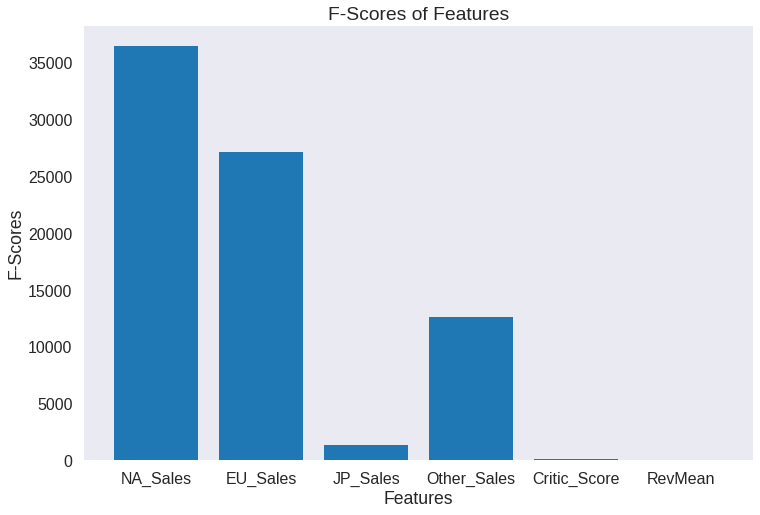

In [69]:
# Feature Selection
# We know that quality and relation of features are really important in any supervised machine learning model.
# We are going to use SelectKBest and f_regression modules to determine which features we are going to feed the model with.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
def select_features(X_train, y_train, X_test):
	# we are going to use f regression to determine best 3 features.
	fs = SelectKBest(score_func=f_regression, k=4)
	# fit the train data to SelectKBest model
	fs.fit(X_train, y_train)
	# Transform our original data to a new train data only with selected features.
	X_train_fs = fs.transform(X_train)
	# Same process for the test  data.
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

print("F Scores of features: ")
for i in range(len(fs.scores_)):
  print(features.columns[i] , " f score = ", fs.scores_[i])

print("-------------------------------------------------------------------------------------------------")
# plot the scores
fig, ax = plt.subplots(figsize =(12,8))
plt.bar(features.columns, fs.scores_)
plt.title('F-Scores of Features')
plt.xlabel('Features')
plt.ylabel('F-Scores')
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression

#Regressor with Feature Selection
fRegressor = LinearRegression()
fRegressor.fit(X_train_fs,y_train)

y_pred_f= fRegressor.predict(X_test_fs)




In [71]:

from sklearn import metrics
fMSE = metrics.mean_squared_error(y_test,y_pred_f)
fMAE=metrics.mean_absolute_error(y_test, y_pred_f)
fRMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred_f))

print("Mean Squared Error of Regression with Feature Selection = ",fMSE)
print("---------------------------------------------------------------------------------------")
print("Mean Absolute Error of Regression with Feature Selection = ",fMAE)
print("---------------------------------------------------------------------------------------")
print("Root Mean Squared Error of Regression with Feature Selection = ",fRMSE)




Mean Squared Error of Regression with Feature Selection =  3.8404611871871224e-05
---------------------------------------------------------------------------------------
Mean Absolute Error of Regression with Feature Selection =  0.0038628381439531523
---------------------------------------------------------------------------------------
Root Mean Squared Error of Regression with Feature Selection =  0.006197145461571095


# Predicting Hit Games with RFC

In [57]:
dataML = finaldf[['Platform', 'Genre', 'Publisher', 'Year_of_Release', 'Critic_Score', 'Global_Sales']]

dataML['Hit'] = dataML['Global_Sales']
dataML.drop('Global_Sales', axis=1, inplace=True)

def isHit(sale):
  if sale >= 1:
    return 1
  else: 
    return 0
dataML['Hit'] = dataML['Hit'].apply(lambda x: isHit(x))

#We are going to try predict the games with over 1 million global sales value. 
#In order to do that we created the isHit function. 
#isHit function creates a new column and marks the games with more than 1 million global sales values as 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [58]:
from pandas import get_dummies
dataML_copy = pd.get_dummies(dataML)

dataML_copy
#We create dummies in order to use categorical values in Random Forrest Classifier.
#So, for every categorical value in the dataset it creates a new column and the new values are 1 or 0.

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS2,Platform_PS3,...,Publisher_Microsoft Game Studios,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Sony,Publisher_Square Enix,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Warner Bros. Interactive Entertainment
0,2006.0,76.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2008.0,82.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2009.0,80.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2006.0,89.0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2006.0,58.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,2016.0,55.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3242,2014.0,65.0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3243,2013.0,69.0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3244,2016.0,72.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
print("The total game number that is global sale value is more than 1 million is:",dataML_copy['Hit'][dataML_copy['Hit'] == 1].count())

The total game number that is global sale value is more than 1 million is: 738


In [60]:
data_dummy = dataML_copy
label = data_dummy['Hit']
data_dummy =data_dummy.drop(['Hit'], axis=1)
features = data_dummy

#We choose the label and features. 
#Hit column chosen for label and the rest of the dataset chosen for features

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.50, random_state = 2)

#We create test and train data with using train test split function. 
#Test size represents the proportion of the dataset to include in the test split.

In [62]:
from sklearn.ensemble import RandomForestClassifier
forestClassifier = RandomForestClassifier(random_state = 2).fit(X_train, y_train)
y_pred = forestClassifier.predict(X_test)
print(y_pred )

#We create the random forrest classifier and fit the train data. 
#Then we predict the values with forestClassifier.predict function.

[0 0 0 ... 1 0 0]


In [63]:
resultdf = X_test[['Year_of_Release', 'Critic_Score']]
resultdf['Hit'] = y_test
resultdf['PredHit'] = y_pred
resultdf.head(500)

resultdf[resultdf['Year_of_Release'] == 2010].head(10)

#We create a new dataframe with predicted Hit values. 
#In order to compare Hit values and predicted Hit values we crete new two columns for both of them.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year_of_Release,Critic_Score,Hit,PredHit
2156,2010.0,50.0,0,0
1752,2010.0,79.0,0,1
2397,2010.0,59.0,0,0
1257,2010.0,78.0,0,0
1815,2010.0,71.0,0,0
2299,2010.0,53.0,0,0
15,2010.0,68.0,1,0
1729,2010.0,88.0,0,1
1166,2010.0,60.0,0,0
537,2010.0,90.0,1,1


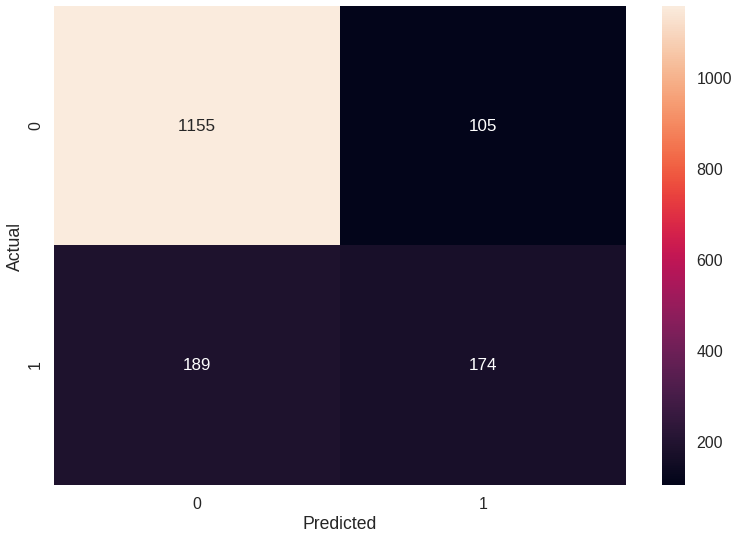

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
# We create the heat map in order to see how successfully predicted the Hit values.

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt="d",annot_kws={"size": 17})
plt.show()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1260
           1       0.62      0.48      0.54       363

    accuracy                           0.82      1623
   macro avg       0.74      0.70      0.71      1623
weighted avg       0.81      0.82      0.81      1623



Precision value shows us, what percentage of the values we predict as 0 or 1 are actually 0 or 1. Our precision value for 0 is 0.86 and this value is really good for our RFC model. But precision value for 1 is lower than 0's precision value and it is 0.62.

Recall value is the measure of our model correctly identifying True Positives. Thus, for all 0's or 1's in the Hit column, recall tells us how many we correctly identified as a 0 or 1. For 0, recall value is 0.92 and for 1 it is 0.48.